In [1]:
import numpy as np
from matplotlib import pyplot as plt

from filters import ParticleFilter
from utils import (
    generate_radar_measurement_data,
    run_radar_position_estimation,
    plot_radar_result,
    plot_measurement_vs_estimation,
)

# 예제 1 : 레이다 추적

In [2]:
class RadarPF(ParticleFilter):
    def __init__(self, dt, x0, **kwargs):
        super().__init__(x0, **kwargs)
        self.dt = dt
        
    def f(self, x):
        A = np.eye(3) + dt * np.array([0, 1, 0, 0, 0, 0, 0, 0, 0]).reshape(3, 3)
        return A @ x
    
    def h(self, x):
        x1, x2, x3 = x
        return ((x1**2 + x3**2)**0.5)[None]
        

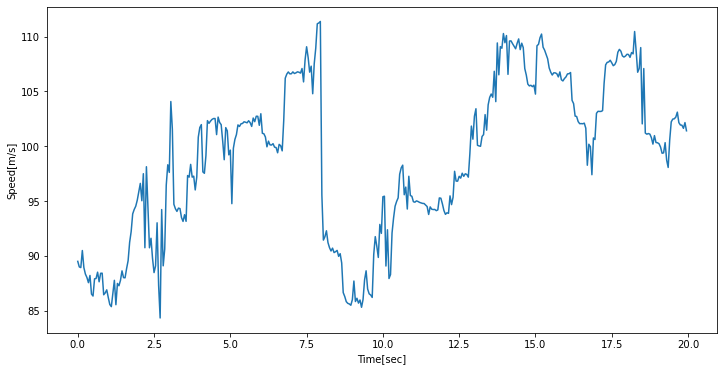

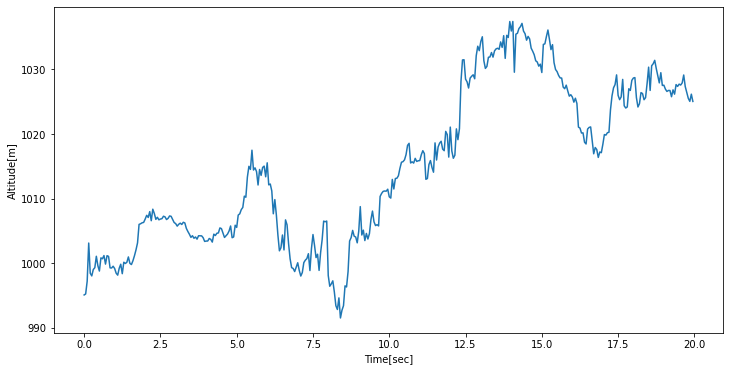

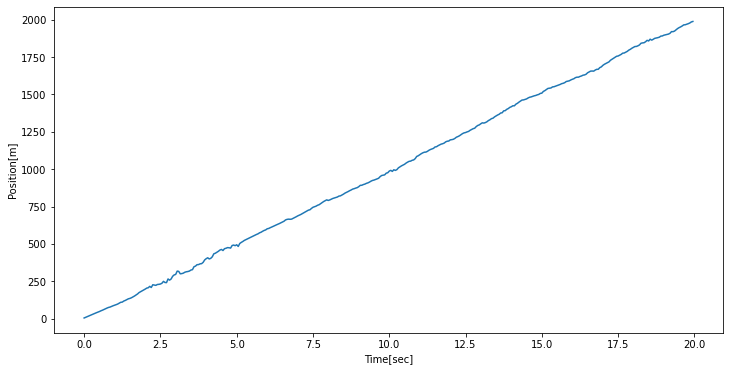

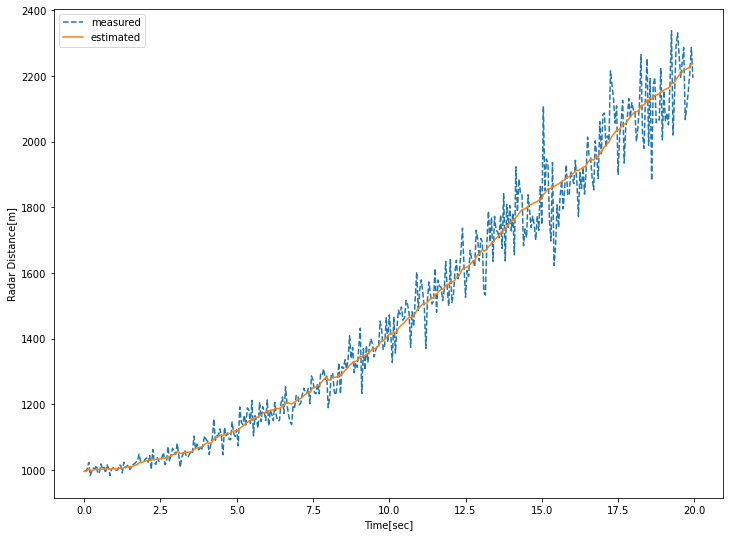

In [3]:
dt = 0.05
ts = np.arange(0, 20, dt)

pf = RadarPF(
    dt = dt,
    x0 = np.array([[0, 90, 1100]]).T,
)

measurements, estimations, speeds, altitudes, positions = run_radar_position_estimation(
    pf, ts, generate_radar_measurement_data(dt)
)
plot_radar_result(ts, speeds, altitudes, positions)
plot_measurement_vs_estimation(ts, measurements, estimations, "Radar Distance[m]")